# Web アクセスの解析
## 入力データの把握

In [1]:
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = sp.genfromtxt('data/web_traffic.tsv', delimiter='\t')
print data[:10]

[[  1.00000000e+00   2.27200000e+03]
 [  2.00000000e+00   1.65600000e+03]
 [  3.00000000e+00   1.38600000e+03]
 [  4.00000000e+00   1.36500000e+03]
 [  5.00000000e+00   1.48800000e+03]
 [  6.00000000e+00   1.33700000e+03]
 [  7.00000000e+00   1.88300000e+03]
 [  8.00000000e+00   2.28300000e+03]
 [  9.00000000e+00   1.33500000e+03]
 [  1.00000000e+01   1.02500000e+03]]


In [3]:
print data.shape
x = data[:, 0]
y = data[:, 1]
print sp.sum(sp.isnan(y))

(743L, 2L)
0


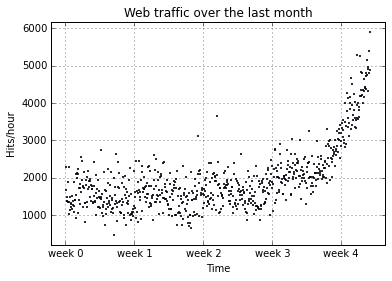

In [4]:
def plot_data():
    plt.scatter(x, y, s=1)
    plt.title('Web traffic over the last month')
    plt.xlabel('Time')
    plt.ylabel('Hits/hour')
    plt.xticks([w * 7 * 24 for w in range(10)],
               ['week %d' % w for w in range(10)])
    plt.autoscale(tight=True)
    plt.grid()

plot_data()

## 線形回帰

In [5]:
def error(f, x, y):
    return sp.sum((f(x) - y)**2)

fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full=True)
print 'Model parameters: %s' % fp1
f1 = sp.poly1d(fp1)
print f1
print error(f1, x, y)

Model parameters: [    2.57152281  1002.10684085]
 
2.572 x + 1002
319874314.777


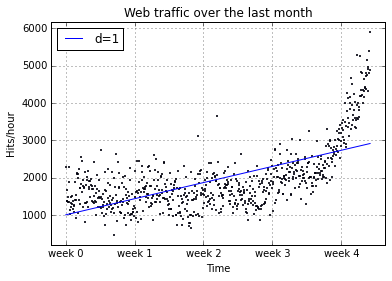

In [6]:
xs = sp.linspace(0, x[-1], 1000)
plot_data()
plt.plot(xs, f1(xs))
plt.legend(['d=%d' % f1.order], loc='upper left')

## 高次の多項式で近似

In [7]:
fs = {1: f1}
for d in (2, 3, 10, 100):
    fp = sp.polyfit(x, y, d)
    fs[d] = sp.poly1d(fp)

for d in (1, 2, 3, 10, 100):
    print 'Error d=%d: %g' % (d, error(fs[d], x, y))

Error d=1: 3.19874e+08
Error d=2: 1.82006e+08
Error d=3: 1.40656e+08
Error d=10: 1.23592e+08
Error d=100: 1.11276e+08


C:\Users\Owner\Anaconda2\lib\site-packages\numpy\lib\polynomial.py:580: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\Users\Owner\Anaconda2\lib\site-packages\numpy\lib\polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


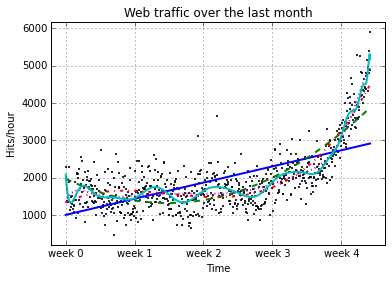

In [8]:
plot_data()
lines = ('b-', 'g--', 'r-.', 'm:', 'c-')
i = 0
for d in (1, 2, 3, 10, 100):
    plt.plot(xs, fs[d](xs), lines[i], linewidth=2)
    i += 1

## 折れ線による近似

Error inflection = 1.36468e+08


(0, 6200)

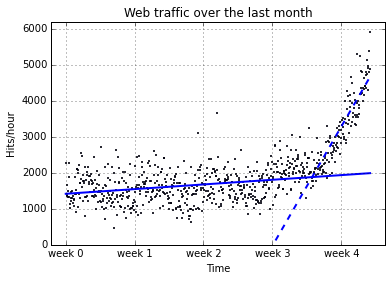

In [9]:
inflection = 3.5 * 7 * 24
xa = x[:inflection]
ya = y[:inflection]
xb = x[inflection:]
yb = y[inflection:]

fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))
print 'Error inflection = %g' % (error(fa, xa, ya) + error(fb, xb, yb))

plot_data()
plt.plot(xs, fa(xs), 'b-', linewidth=2)
plt.plot(xs, fb(xs), 'b--', linewidth=2)
plt.ylim((0, 6200))